In [12]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not(PATH/FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH/FILENAME).open("wb").write(content)

ConnectTimeout: HTTPConnectionPool(host='deeplearning.net', port=80): Max retries exceeded with url: /data/mnist/mnist.pkl.gz (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f98ff86bcd0>, 'Connection to deeplearning.net timed out. (connect timeout=None)'))

In [17]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


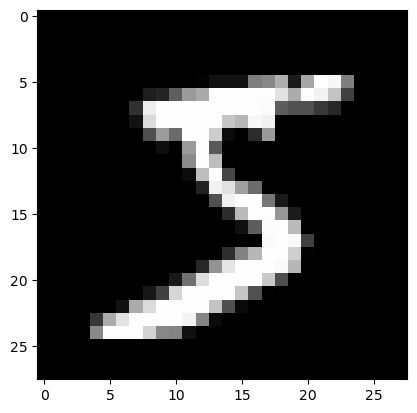

In [18]:
from  matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

# 注意数据需要转换成tensor才能参与后续建模训

In [20]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


/var/folders/2g/d27fqh0s1x15sknzqypt6cd00000gn/T/ipykernel_35921/2266007477.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, y_train, x_valid, y_valid = map(


#### torch.nn.functional很多层和函数在这里都会见到
- torch.nn.functional有很多功能，后续会常用的，那什么时候使用nn.Module,什么时候使用nn.functional？
- 一般情况下，如果模型有可学习的参数，最好用nn.Module,其他情况nn.functional相对更简单一些

In [21]:
import torch.nn.functional as F
loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [22]:
bs = 64
xb = x_train[0:bs] # a mini-batch  from x
yb = y_train[0:bs]
weights = torch.randn([784, 10], dtype = torch.float, requires_grad = True)
bs = 64
bias = torch.zeros(10, requires_grad=True)
print(loss_func(model(xb), yb))

tensor(12.7821, grad_fn=<NllLossBackward0>)


#### 创建一个model来更简化代码
- 必须继承nn.Module且在其构造函数中需要调用nn.Module的构造函数
- 无需写反向传播函数，nn.Module能够利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器


In [23]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

net = Mnist_NN()
print(net)

Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)
